In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

C:\Users\urvas\AppData\Local\Temp\ipykernel_5320\640806056.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [12]:
df1 = pd.read_csv('data/df1.csv')
df2 = pd.read_csv('data/df2.csv')
df = pd.concat([df1,df2])
df = df[['name','album','artist','id','release_date','popularity','danceability','energy','valence','loudness']]

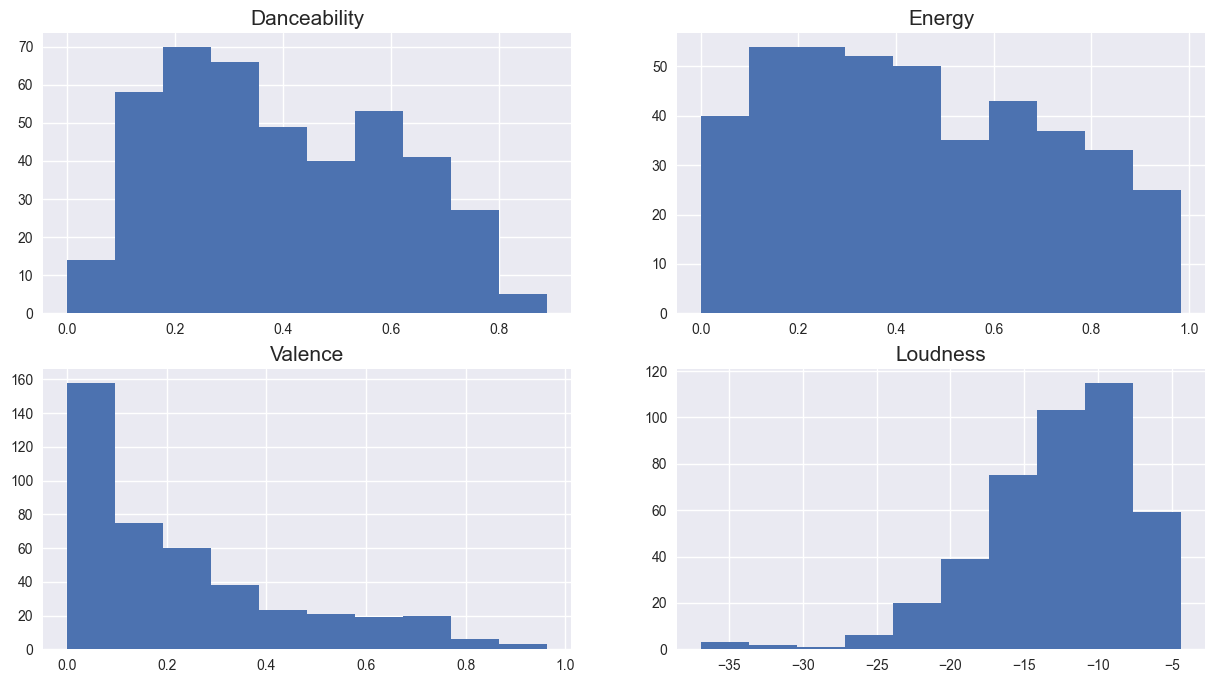

In [13]:
fig,axes = plt.subplots(2,2,figsize=(15,8))

axes[0,0].hist(df['danceability'])
axes[0,0].set_title('Danceability',fontsize=15)
axes[0,1].hist(df['energy'])
axes[0,1].set_title('Energy',fontsize=15)
axes[1,0].hist(df['valence'])
axes[1,0].set_title('Valence',fontsize=15)
axes[1,1].hist(df['loudness'])
axes[1,1].set_title('Loudness',fontsize=15)
plt.show()

In [14]:
df.describe()

,popularity,danceability,energy,valence,loudness
count,423.000000,423.000000,423.000000,423.000000,423.000000
mean,32.628842,0.395588,0.446771,0.236248,-12.805064
std,17.830344,0.203246,0.267740,0.221957,5.176817
min,0.000000,0.000000,0.000791,0.000000,-36.892000
25%,17.000000,0.228000,0.210000,0.047200,-15.899500
50%,33.000000,0.358000,0.420000,0.157000,-11.826000
75%,47.000000,0.563500,0.664500,0.345000,-8.801500
max,82.000000,0.890000,0.985000,0.964000,-4.345000


In [15]:
col_features = df.columns[6:]
X = MinMaxScaler().fit_transform(df[col_features])

In [16]:
kmeans = KMeans(init="k-means++",n_clusters=4,random_state=15).fit(X)

c:\Users\urvas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
df['kmeans'] = kmeans.labels_

Text(0.5, 0.92, '3D Scatter Plot of Songs Clustered')

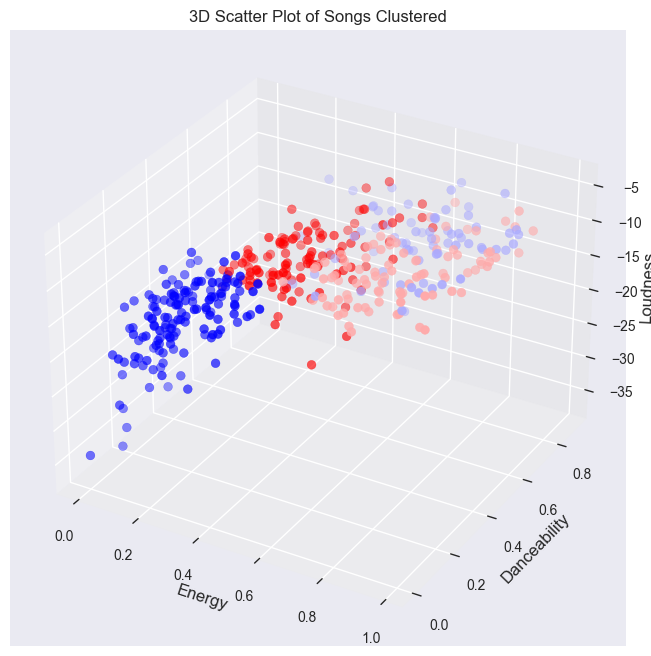

In [18]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = df['energy']
y = df['danceability']
z = df['loudness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z,c=df['kmeans'],s=40,cmap=cmhot)
ax.set_xlabel('Energy',fontsize=12)
ax.set_ylabel('Danceability',fontsize=12)
ax.set_zlabel('Loudness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")



In [19]:
df.groupby(['kmeans']).mean()

TypeError: Could not convert An AuditionThe TouristThe Tourist - RemasteredIron SwallowLet Me GoNo Other Love (feat. Jo Stafford)OilSail OnSougen, Kaze, ZoukibayashiThe Witching HourThree Miniatures From WaterA Choir of OneA Conversation With Just Your EyesA Light GreenA Soft Hand Across Your FaceA Storm That Took EverythingBelongings Thrown in a RiverCodexDaily BattlesDaily Battles (feat. Joe Farnsworth, Russell Hall, Isaiah J. Thompson & Jerry Weldon) - Jazz ArrangementDawn ChorusDaydreamingGive Up The GhostGlass EyesHarry Patch (In Memory Of)How I Made My Millions - RemasteredHow To Disappear CompletelyHunting BearsI WillInterferenceKlemperer WalksLife In a GlasshouseMK 1MK 2Motion Picture SoundtrackOlga's Destruction - Volk tapePink SectionPyramid SongSabbath IncantationSpectreSuspirium (Arr. Rimmer)Suspirium FinaleThe Balance of ThingsThe Conjuring of AnkeThe EpilogueThe HooksThe Inevitable PullThe JumpsThe Room of CompartmentsThe Universe is IndifferentThe7th7th7th7thsonTreefingersTrue Love WaitsTruth RayUnmadeUnmade OvertonesUntitledUnused SpellVolkVolk Spin Off v2We Suck Young BloodYou And Whose Army?YouWouldn'tLikeMeWhenI'mAngryAlethiaAlmaApplication 45 Version 1Ate mo Naku Aruki MawattaAtomic HealerBack BeyondBaton SparksBode Radio / Glass Light / Broken HeartsBoletus FelleusCatch HoldChanging Partners (feat. Helen Forrest)Cloak of the NightDe-Tuned QuartetDon't Go Now (Elysian Quartet)Don't Go Now - Lanterns on the Lake RemixEat Him By His Own LightEat Him by His Own LightEndless SuperstitionFor the Hungry BoyGet Thee Behind Me Satan (feat. Ella Fitzgerald)Greenwood: 48 Responses to Polymorphia: Baton SparksGreenwood: 48 Responses to Polymorphia: BridgeGreenwood: 48 Responses to Polymorphia: Es Is GenugGreenwood: 48 Responses to Polymorphia: OverhangGreenwood: 48 Responses to Polymorphia: OvertonesGreenwood: 48 Responses to Polymorphia: RanjGreenwood: 48 Responses to Polymorphia: ScanGreenwood: 48 Responses to Polymorphia: Three Oak LeavesGreenwood: Popcorn Superhet Receiver:, Pt. 1Greenwood: Popcorn Superhet Receiver:, Pt. 3HW / Hope of New FieldsHageshii GenchouHelga's ThemeHelga's Theme (Saw)Henry PlainviewHis Master's VoiceHouse of WoodcockI'll Follow TomorrowIiko Dakara DamatteteIndustryLast ActLet Me Go (Rhodes)Mata Aini Kuru kara NeMoon TrillsMou Sukoshi Jibun no Koto, Kichinto ShitainoMuttiNaoko ga ShindaNever CursedOpen SpacesOvertonesPeartreePenderecki: PolymorphiaPenderecki: Threnody for the Victims of HiroshimaPhantom Thread IPhantom Thread IIPhantom Thread IIIPhantom Thread IV (feat. Daniel Pioro)Playground (Bass Clarinet)Prospector's QuartetProspectors ArriveProven Lands (Intro)Quartertone BloomReikoSandalwood IISanta TeresaSnakecharmerStranded the LineSweetness of FreddieTehelletThat's As May BeThe HemThe Split SaberThe Tailor of FitzroviaThere Will Be BloodTime HoleToki no Senrei wo Uketeinai mono wo YomunaTree StringsTree SynthesisersVottoWatashi wo Toru Toki wa Watashi Dake wo Totte NeYWNRHYwnrhZakopane to numeric

In [ ]:
cluster_0 = df[df['kmeans']==0]
cluster_1  = df[df['kmeans']==1]

In [ ]:
cluster_0.to_csv("data/cluster0.csv",index=False)
cluster_1.to_csv("data/cluster1.csv",index=False)
df.to_csv("data/df.csv",index=False)